In [29]:
import os
for dirname, _, filenames in os.walk('/users/arayc/documents/Capstone Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/users/arayc/documents/Capstone Project\Copy of Kaggle_Sirio_Libanes_ICU_Prediction.csv
/users/arayc/documents/Capstone Project\Kaggle_Sirio_Libanes_ICU_Prediction.xlsx
/users/arayc/documents/Capstone Project\Predicting COVID-19 ICU Admissions.pptx
/users/arayc/documents/Capstone Project\Capstone\.gitattributes
/users/arayc/documents/Capstone Project\Capstone\.git\COMMIT_EDITMSG
/users/arayc/documents/Capstone Project\Capstone\.git\config
/users/arayc/documents/Capstone Project\Capstone\.git\description
/users/arayc/documents/Capstone Project\Capstone\.git\HEAD
/users/arayc/documents/Capstone Project\Capstone\.git\index
/users/arayc/documents/Capstone Project\Capstone\.git\hooks\applypatch-msg.sample
/users/arayc/documents/Capstone Project\Capstone\.git\hooks\commit-msg.sample
/users/arayc/documents/Capstone Project\Capstone\.git\hooks\fsmonitor-watchman.sample
/users/arayc/documents/Capstone Project\Capstone\.git\hooks\post-update.sample
/users/arayc/documents/Capstone Project\Capston

In [30]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn

In [31]:
# Ingest the dataset from the CSV file
df = pd.read_excel('/users/arayc/documents/Capstone Project/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

In [32]:
# Display the Dataframe
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [33]:
df.shape

(1925, 231)

In [34]:
print(df.describe())

       PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297279            0.1393

I will take a look at the information regarding the columns in order to understand the data types I'm dealing with.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [36]:
# Indentify the object columns
object_col = df.select_dtypes(include = 'object')
object_col

,AGE_PERCENTIL,WINDOW
0,60th,0-2
1,60th,2-4
2,60th,4-6
3,60th,6-12
4,60th,ABOVE_12
...,...,...
1920,50th,0-2
1921,50th,2-4
1922,50th,4-6
1923,50th,6-12


In [37]:
#Determine which category columns have missing values
missing_values = object_col.isnull().sum()
missing_values

AGE_PERCENTIL    0
WINDOW           0
dtype: int64

Neither of the object columns have any missing values.

In [38]:
#Encode categorial columns
label_encoder = LabelEncoder()
df['AGE_PERCENTIL'] = label_encoder.fit_transform(df['AGE_PERCENTIL'])

# using the given encoding in data-card
window_mapping = {'0-2': 0, '2-4': 1, '4-6': 2, '6-12': 3, 'ABOVE_12': 4}
df['WINDOW'] = df['WINDOW'].map(window_mapping)

In [39]:
#Identify the int64 type columns
int64_col = df.select_dtypes(include = 'int64')
int64_col

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,WINDOW,ICU
0,0,1,0,0,0
1,0,1,0,1,0
2,0,1,0,2,0
3,0,1,0,3,0
4,0,1,0,4,1
...,...,...,...,...,...
1920,384,0,1,0,0
1921,384,0,1,1,0
1922,384,0,1,2,0
1923,384,0,1,3,0


In [40]:
#Determine which int64 columns have missing values
missing_int64_values = int64_col.isnull().sum()
missing_int64_values

PATIENT_VISIT_IDENTIFIER    0
AGE_ABOVE65                 0
GENDER                      0
WINDOW                      0
ICU                         0
dtype: int64

NONE OF THE INT64 COLUMNS HAVE ANY MISSING DATA.

In [41]:
#Identify the float64 type columns and determine how many have missing values
float64_col = df.select_dtypes(include = 'float64')
missing_float64_values = float64_col.isnull().sum()
missing_float64_values

DISEASE GROUPING 1                   5
DISEASE GROUPING 2                   5
DISEASE GROUPING 3                   5
DISEASE GROUPING 4                   5
DISEASE GROUPING 5                   5
                                  ... 
BLOODPRESSURE_SISTOLIC_DIFF_REL    685
HEART_RATE_DIFF_REL                685
RESPIRATORY_RATE_DIFF_REL          748
TEMPERATURE_DIFF_REL               694
OXYGEN_SATURATION_DIFF_REL         686
Length: 225, dtype: int64

In [42]:
## Determine, by Patient, which ones were admitted to the ICU at some point.  This will allow us to drop the dataframe rows where the ICU itself is 1 since
## the specs state that we should not use data from windows where the patient has been placed in the ICU.

Zmap = df.loc[df.ICU==1,:].groupby('PATIENT_VISIT_IDENTIFIER').sum().to_dict()['WINDOW']

df.loc[:,'ICU_EVER'] = df.PATIENT_VISIT_IDENTIFIER.apply(lambda x: Zmap[x] if x in Zmap.keys() else 0)

## If the above calculated ICU_EVER column is greater than 0 then it means that patient was at some point placed in ICU,
## so I'll replace that ICU_EVER value with 1 so that the values in the ICU_EVER field will be either 0 (if never placed
## in the ICU) or 1 (if they were placed in the ICU at any point
df.loc[df.ICU_EVER >0, 'ICU_EVER'] = 1

## Remove all rows of the data frame where the ICU field is 1 by specifying to keep only the rows where ICU is 0 in order
## to not consider rows where the patient was already admitted per the specs.
df = df[df.ICU == 0]

df=df.drop(['ICU','PATIENT_VISIT_IDENTIFIER','WINDOW'], axis=1)



Datacard indicates that use of forward and back filling is appropriate for missing values.  Thus, I will use these methods to fill in the missing values in the float64 columns.

In [43]:
#Forward fill if previous value exists, otherwise back fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Check for missing values after fill
missing_cols_after_fill = df.columns[df.isnull().any()]

if len(missing_cols_after_fill) == 0:
    print("No more missing values in the dataset after filling.")
else:
    for col in missing_cols_after_fill:
        print(f"Column '{col}' still has missing values.")

No more missing values in the dataset after filling.


C:\Users\arayc\AppData\Local\Temp\ipykernel_12464\250481072.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\arayc\AppData\Local\Temp\ipykernel_12464\250481072.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [44]:
df

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU_EVER
0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
3,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1921,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1922,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1923,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0


In [45]:
#we find the feature that is most correlated or collinear
cor = pd.DataFrame(np.triu(df.corr().values), index = df.corr().index,
                   columns=df.corr().columns).round(3)
x = cor.unstack()
xo = x.sort_values()

most_correlated = xo[xo>0.95][xo[xo>0.90] !=1] # features more collinear

pd.DataFrame(most_correlated, columns=['correlation'])


correlation
NEUTROPHILES_MIN                 LEUKOCYTES_MIN                      0.954
NEUTROPHILES_MAX                 LEUKOCYTES_MAX                      0.954
                                 LEUKOCYTES_MEAN                     0.954
                                 LEUKOCYTES_MEDIAN                   0.954
NEUTROPHILES_MIN                 LEUKOCYTES_MEAN                     0.954
                                 LEUKOCYTES_MAX                      0.954
NEUTROPHILES_MAX                 LEUKOCYTES_MIN                      0.954
NEUTROPHILES_MEAN                LEUKOCYTES_MEAN                     0.954
NEUTROPHILES_MEDIAN              LEUKOCYTES_MAX                      0.954
NEUTROPHILES_MEAN                LEUKOCYTES_MAX                      0.954
                                 LEUKOCYTES_MIN                      0.954
                                 LEUKOCYTES_MEDIAN                   0.954
NEUTROPHILES_MEDIAN              LEUKOCYTES_MEDIAN                   0.954
                                 LEUKOCYTES_MEAN                     0.954
                                 LEUKOCYTES_MIN                      0.954
NEUTROPHILES_MIN                 LEUKOCYTES_MEDIAN                   0.954
HEMOGLOBIN_MEAN                  HEMATOCRITE_MIN                     0.974
                                 HEMATOCRITE_MAX                     0.974
HEMOGLOBIN_MIN                   HEMATOCRITE_MEDIAN                  0.974
                                 HEMATOCRITE_MEAN                    0.974
                                 HEMATOCRITE_MIN                     0.974
                                 HEMATOCRITE_MAX                     0.974
HEMOGLOBIN_MAX                   HEMATOCRITE_MEDIAN                  0.974
                                 HEMATOCRITE_MEAN                    0.974
HEMOGLOBIN_MEDIAN                HEMATOCRITE_MEDIAN                  0.974
HEMOGLOBIN_MAX                   HEMATOCRITE_MIN                     0.974
HEMOGLOBIN_MEDIAN                HEMATOCRITE_MEAN                    0.974
                                 HEMATOCRITE_MIN                     0.974
HEMOGLOBIN_MEAN                  HEMATOCRITE_MEAN                    0.974
HEMOGLOBIN_MEDIAN                HEMATOCRITE_MAX                     0.974
HEMOGLOBIN_MAX                   HEMATOCRITE_MAX                     0.974
HEMOGLOBIN_MEAN                  HEMATOCRITE_MEDIAN                  0.974
RESPIRATORY_RATE_MEDIAN          RESPIRATORY_RATE_MEAN               0.984
BLOODPRESSURE_DIASTOLIC_MEDIAN   BLOODPRESSURE_DIASTOLIC_MEAN        0.985
HEART_RATE_DIFF_REL              HEART_RATE_DIFF                     0.985
TEMPERATURE_MEDIAN               TEMPERATURE_MEAN                    0.987
BLOODPRESSURE_DIASTOLIC_DIFF_REL BLOODPRESSURE_DIASTOLIC_DIFF        0.990
BLOODPRESSURE_SISTOLIC_MEDIAN    BLOODPRESSURE_SISTOLIC_MEAN         0.990
HEART_RATE_MEDIAN                HEART_RATE_MEAN                     0.990
BLOODPRESSURE_SISTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF         0.993
RESPIRATORY_RATE_DIFF_REL        RESPIRATORY_RATE_DIFF               0.996

In [46]:
n = len(most_correlated)
print('Total number of most correlated features is: {}'.format(n))

Total number of most correlated features is: 41


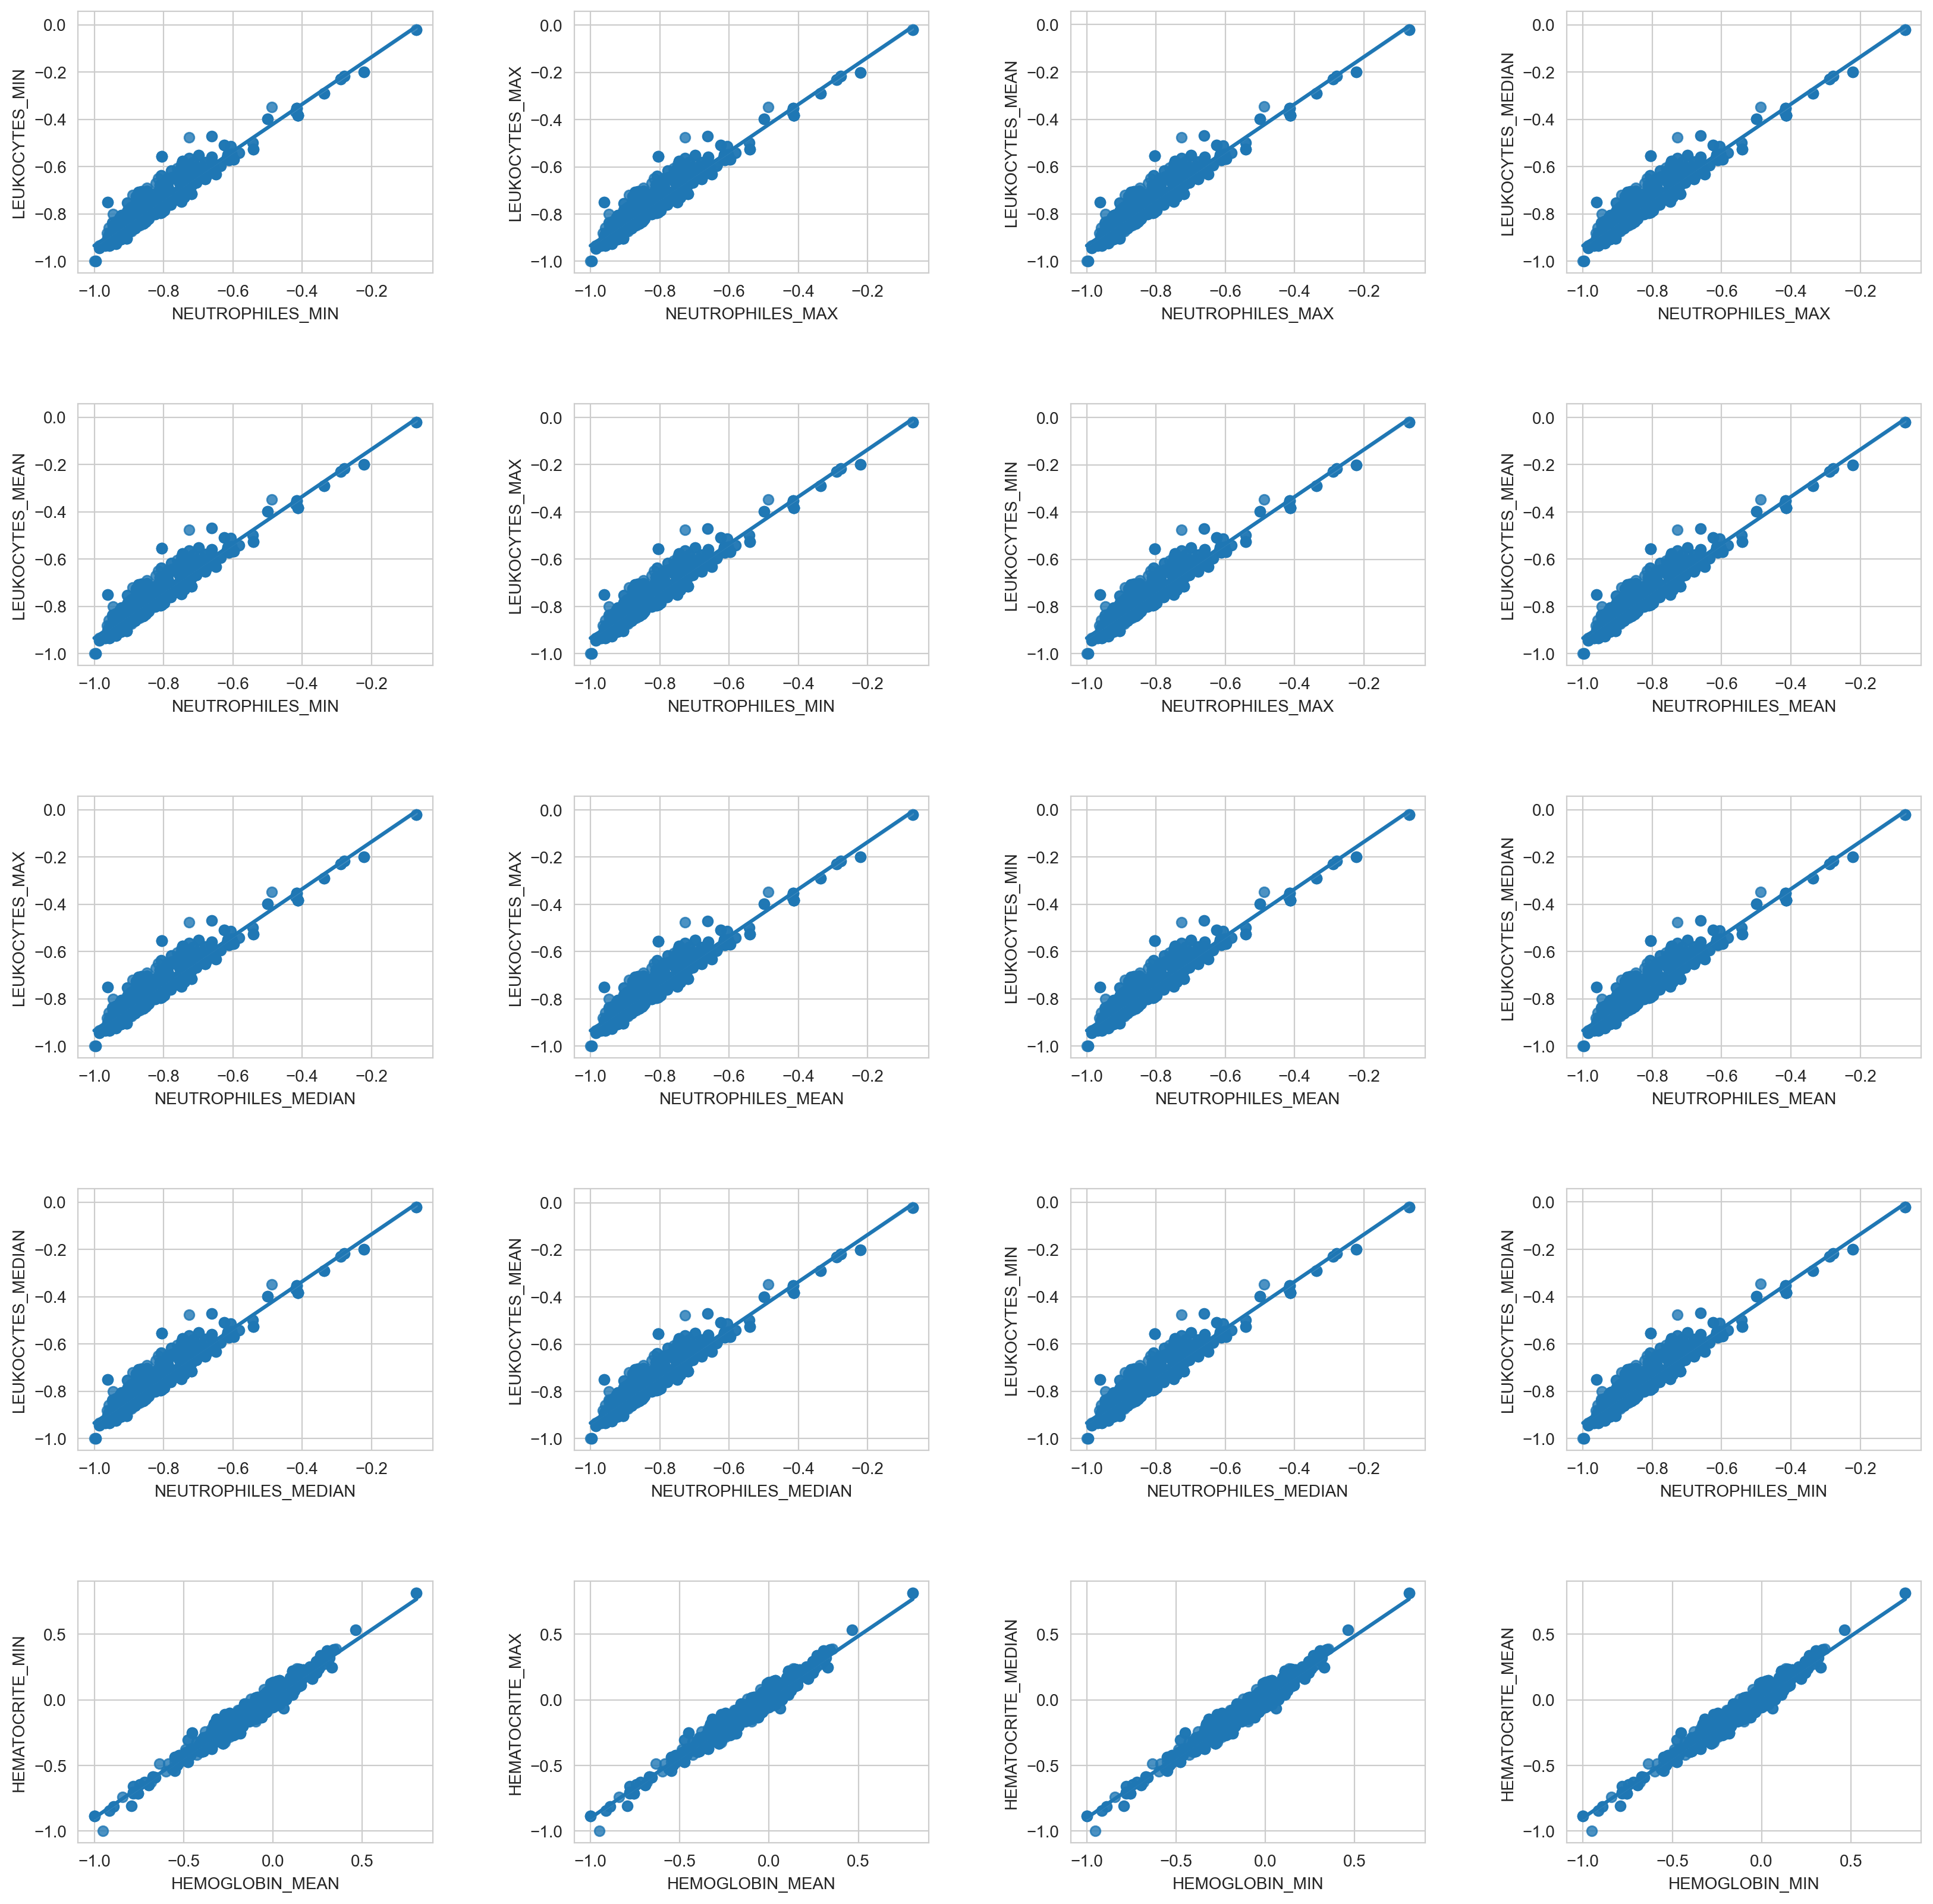

In [47]:
# plot the 20 most correlated features 
fig = plt.figure(dpi=200, figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i in range(1, 21):
    ax = fig.add_subplot(5,4,i)
    col1 = most_correlated.index[i-1][0]
    col2 = most_correlated.index[i-1][1] 
    sns.regplot(df, x=col1, y=col2)

In [48]:
# Determine the columns that we remove (were not in the top 20)
col_not_selected = []
for row in most_correlated.index:
    col_not_selected.append(row[0])
# Show the features not selected    
np.unique(col_not_selected)

array(['BLOODPRESSURE_DIASTOLIC_DIFF_REL',
       'BLOODPRESSURE_DIASTOLIC_MEDIAN',
       'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
       'HEART_RATE_DIFF_REL', 'HEART_RATE_MEDIAN', 'HEMOGLOBIN_MAX',
       'HEMOGLOBIN_MEAN', 'HEMOGLOBIN_MEDIAN', 'HEMOGLOBIN_MIN',
       'NEUTROPHILES_MAX', 'NEUTROPHILES_MEAN', 'NEUTROPHILES_MEDIAN',
       'NEUTROPHILES_MIN', 'RESPIRATORY_RATE_DIFF_REL',
       'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN'], dtype='<U32')

In [49]:
# Drop the not selected features from the dataframe

df = df.drop(columns=np.unique(col_not_selected))

In [50]:
df

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU_EVER
0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
3,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1921,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1922,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1923,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.473684,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0


In [51]:
# Cleaned Data
print(df.describe())


       AGE_ABOVE65  AGE_PERCENTIL       GENDER  DISEASE GROUPING 1  \
count  1410.000000    1410.000000  1410.000000         1410.000000   
mean      0.403546       3.907092     0.387943            0.096454   
std       0.490783       2.802568     0.487454            0.295317   
min       0.000000       0.000000     0.000000            0.000000   
25%       0.000000       1.000000     0.000000            0.000000   
50%       0.000000       4.000000     0.000000            0.000000   
75%       1.000000       6.000000     1.000000            0.000000   
max       1.000000       9.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1410.000000         1410.000000         1410.000000   
mean             0.019858            0.083688            0.014894   
std              0.139562            0.277018            0.121170   
min              0.000000            0.000000            0.000000   
25%              0.00000

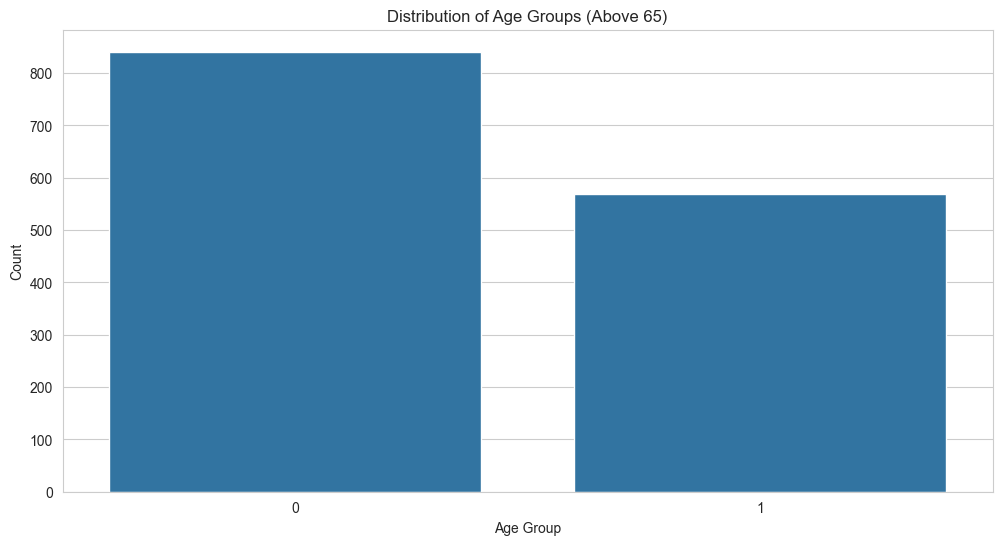

In [52]:
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Plot distribution of age groups
sns.countplot(data=df, x='AGE_ABOVE65')
plt.title('Distribution of Age Groups (Above 65)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

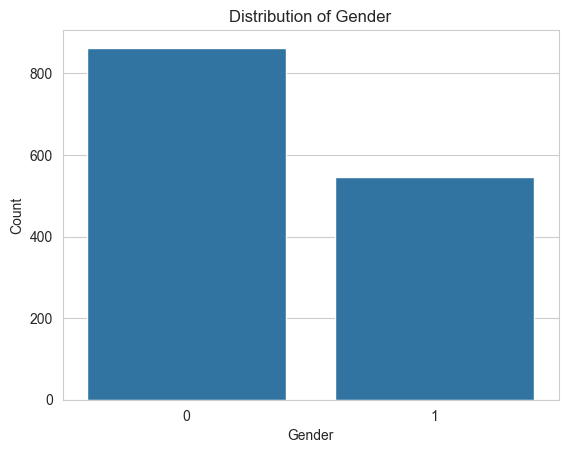

In [53]:
# Plot distribution of gender
sns.countplot(data=df, x='GENDER')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [54]:
icu_admission_rate = df['ICU_EVER'].mean() * 100
print(f"ICU Admission Rate: {icu_admission_rate:.2f}%")



ICU Admission Rate: 32.62%


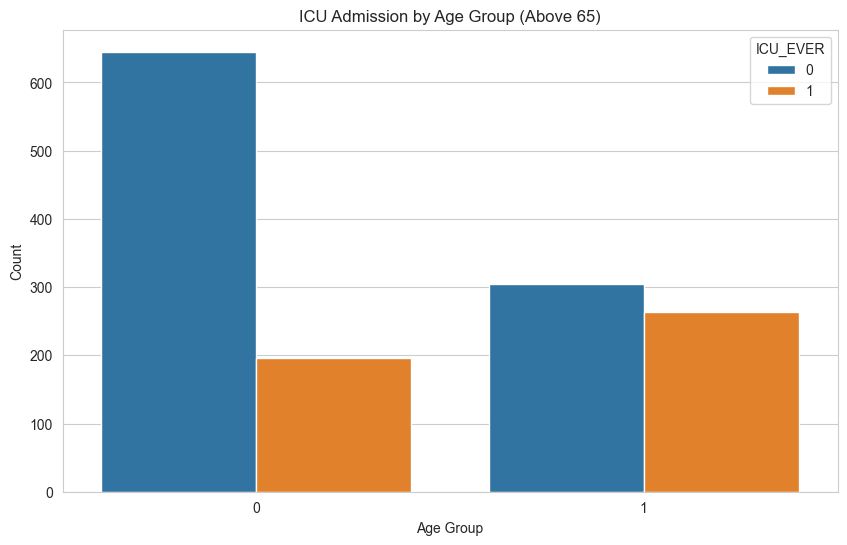

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AGE_ABOVE65', hue='ICU_EVER')
plt.title('ICU Admission by Age Group (Above 65)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

target="ICU_EVER"
X = df.drop(target, axis=1)

y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Classifier:")
print(f"Accuracy: {accuracy_xgb * 100:.2f}%\n")
print("Classification Report:\n", classification_report_xgb)
print("Confusion Matrix:\n", confusion_matrix_xgb)

XGBoost Classifier:
Accuracy: 88.30%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       184
           1       0.85      0.81      0.83        98

    accuracy                           0.88       282
   macro avg       0.87      0.87      0.87       282
weighted avg       0.88      0.88      0.88       282

Confusion Matrix:
 [[170  14]
 [ 19  79]]


In [61]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.drop(target, axis=1)

y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

catboost_classifier = CatBoostClassifier()
catboost_classifier.fit(X_train, y_train)

y_pred_catboost = catboost_classifier.predict(X_test)

accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
classification_report_catboost = classification_report(y_test, y_pred_catboost)
confusion_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

print("CatBoost Classifier:")
print(f"Accuracy: {accuracy_catboost * 100:.2f}%\n")
print("Classification Report:\n", classification_report_catboost)
print("Confusion Matrix:\n", confusion_matrix_catboost)

Learning rate set to 0.010846
0:	learn: 0.6895752	total: 178ms	remaining: 2m 57s
1:	learn: 0.6853399	total: 193ms	remaining: 1m 36s
2:	learn: 0.6802242	total: 206ms	remaining: 1m 8s
3:	learn: 0.6755201	total: 213ms	remaining: 53.1s
4:	learn: 0.6701870	total: 221ms	remaining: 43.9s
5:	learn: 0.6661073	total: 227ms	remaining: 37.6s
6:	learn: 0.6619376	total: 234ms	remaining: 33.2s
7:	learn: 0.6577888	total: 242ms	remaining: 30s
8:	learn: 0.6544616	total: 250ms	remaining: 27.5s
9:	learn: 0.6509712	total: 256ms	remaining: 25.3s
10:	learn: 0.6475393	total: 265ms	remaining: 23.8s
11:	learn: 0.6438581	total: 272ms	remaining: 22.4s
12:	learn: 0.6398122	total: 278ms	remaining: 21.1s
13:	learn: 0.6363142	total: 283ms	remaining: 19.9s
14:	learn: 0.6331919	total: 287ms	remaining: 18.8s
15:	learn: 0.6297633	total: 292ms	remaining: 17.9s
16:	learn: 0.6265585	total: 296ms	remaining: 17.1s
17:	learn: 0.6242937	total: 301ms	remaining: 16.4s
18:	learn: 0.6205281	total: 305ms	remaining: 15.7s
19:	learn: 